# Titanic EDA Report
## Introduction
In this report, we perform exploratory data analysis (EDA) on the Titanic dataset to extract key insights and understand the underlying patterns affecting passenger survival.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv(r'c:\Users\vedan\Downloads\titanic\train.csv')

## Data Overview
- Display `df.head()`
- Display `df.info()`
- Display missing values (`df.isnull().sum()`)
- Comment briefly on missing data.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Looking at the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning
- Fill missing `Embarked` values with the mode.
- Create `Has_Cabin` feature.
- Keep Cabin.


In [ ]:
#filling the null values in the age column with the help of mean in the age column
data['Age'].fillna(data['Age'].mean(),inplace=True)

C:\Users\vedan\AppData\Local\Temp\ipykernel_26756\1761542025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


<Axes: >

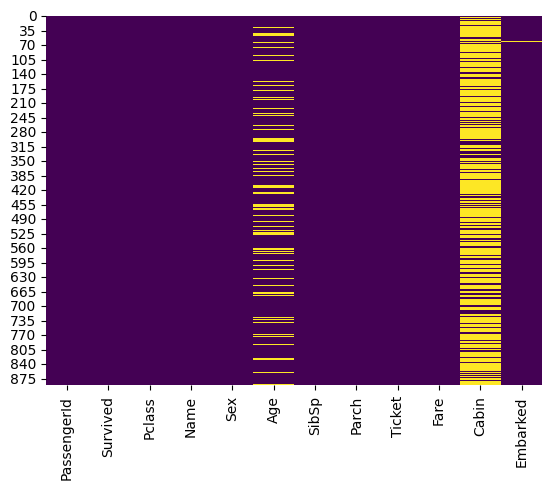

In [7]:
#heatmap to visualize the null values in the dataset
sns.heatmap(data.isnull(),cmap='viridis',cbar=False)

In [ ]:
#gives the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Checking if there are still any missing values in the age column
data['Age'].isnull().sum()

np.int64(0)

In [ ]:
#Creating a new column 'As_Cabin' to check if the passenger has a cabin or not
#1 means the passenger has a cabin and 0 means the passenger does not have a cabin
#This is done by checking if the value in the Cabin Column is not null
data['As_Cabin']=data['Cabin'].notnull().astype(int)

In [ ]:
#Checking the data set
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,As_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
# Check most common Embarked value
print(data['Embarked'].mode())


0    S
Name: Embarked, dtype: object


In [22]:
# Fill missing Embarked values with mode
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [ ]:
#Checking if there are still missing values in Embarked
data['Embarked'].isnull().sum()

np.int64(0)

In [ ]:
#Checking for values in the dataset
data.value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare     Cabin        Embarked  As_Cabin
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833  C85          C         1           1
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)         female  35.0  1      0      113803    53.1000  C123         S         1           1
7            0         1       McCarthy, Mr. Timothy J                              male    54.0  0      0      17463     51.8625  E46          S         1           1
11           1         3       Sandstrom, Miss. Marguerite Rut                      female  4.0   1      1      PP 9549   16.7000  G6           S         1           1
12           1         1       Bonnell, Miss. Elizabeth                             female  58.0  0      0      113783    26.5500  C103         S         1          

In [ ]:
#Checking the values in the Embarked Column
#this gives the count of each value in the embarked column or you can say the number of passengers who baorded from each port
#C= Cherbourg, Q=Queenstown, S=Southampton
data.value_counts('Embarked')

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

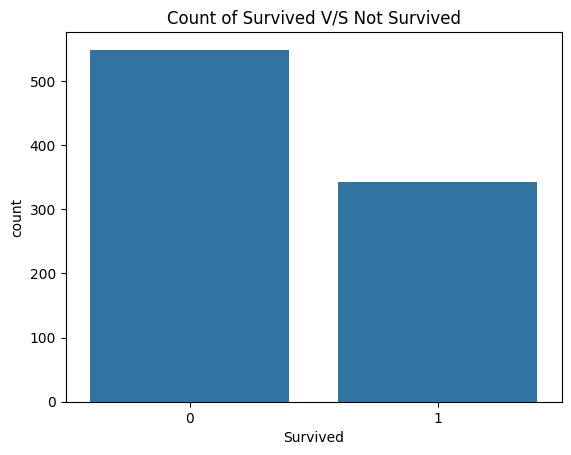

In [ ]:
#Visualization of the data
#This plot shows the overall distribution of passengers who survived and who did not. We observe an imbalance, with a higher number of passengers not surviving the disaster.
#Number of passengers survived and not survived
#1 means survived and 0 means not survived
#Observation: 342 passengers survived and 549 passengers did not survive.
sns.countplot(x="Survived",data=data)
plt.title('Count of Survived V/S Not Survived')
plt.show()

Text(0.5, 1.0, 'Survival Rate between Gender')

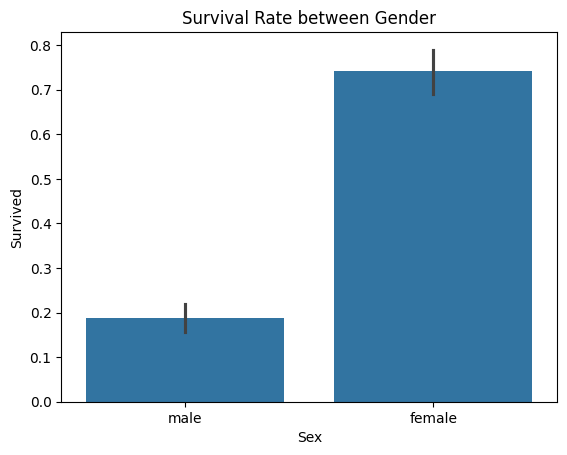

In [ ]:
#Gives us the Survival Rate between Male and Female
#This bar plot compares survival rates between males and females.
#Observation: Females have higher survival rates than males.
sns.barplot(x='Sex',y='Survived',data=data)
plt.title('Survival Rate between Gender')

Text(0.5, 1.0, 'Average Survival Rate by Passenger Class')

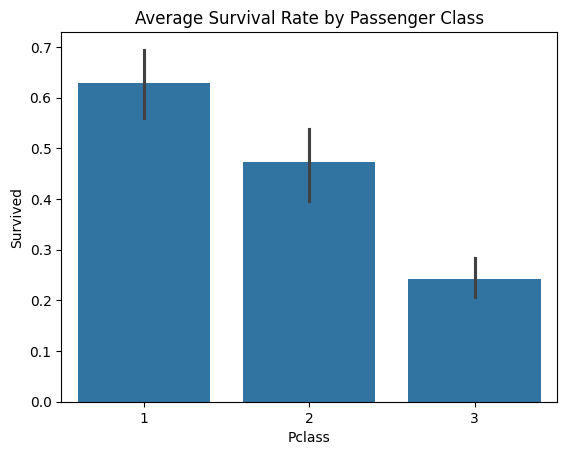

In [ ]:
#Survival by Passenger Class
#This bar plot illustrates survival rates across different passenger classes. 
#Observation: The survival rate is highest for 1st class passengers and the lowest for 3rd class passengers
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title('Average Survival Rate by Passenger Class')

Text(0.5, 1.0, 'Age Distribution of Passengers')

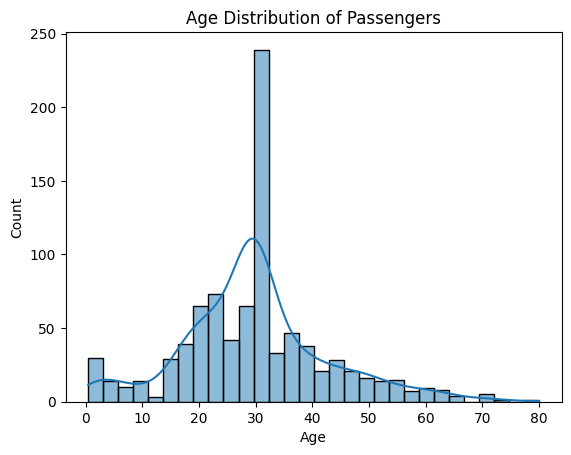

In [ ]:
#Looking for passengers age distribution
#This histogram displays the distribution of passenger ages.
#Observation: The age distribution is right skewed,Most of the passengers are between the ages of 20 and 40,there are also notable numbers of children and elderly passengers.
sns.histplot(data['Age'],kde=True,bins=30)
plt.title('Age Distribution of Passengers')

Text(0.5, 1.0, 'Age V/S Survival')

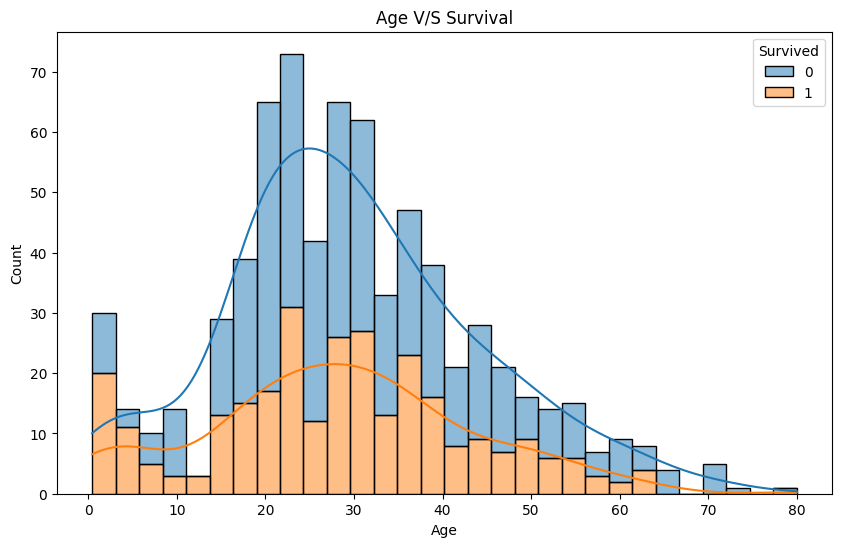

In [ ]:
#Age v/s Survival
#This plot shows how age affected survival. 
#Observation: The survival rate is higher for younger passengers and lower for older passengers, younger passengers have a higher chance of survival than older passengers.
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='Age',hue='Survived',multiple='stack',bins=30,kde=True)
plt.title('Age V/S Survival')

Text(0.5, 1.0, 'Fare Distribution of Passengers')

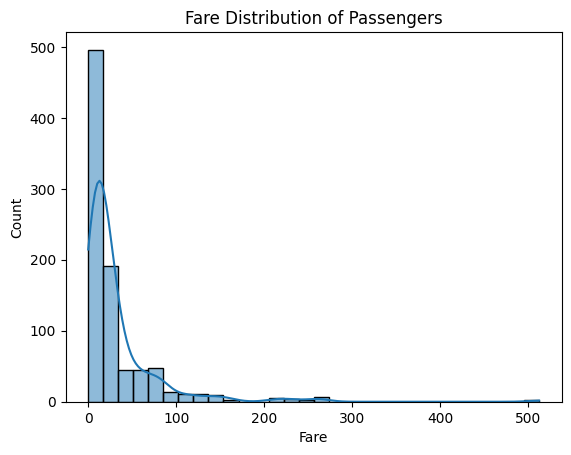

In [ ]:
#Fare Distribution
#This boxplot highlights the fare distribution among survivors and non-survivors.

#Observation: The fare distribution is right skewed, most of the passengers paid a fare between 0 and 100,very few of them paid a fare above 500.
# Survivors generally paid higher fares, suggesting that passengers who paid more (likely 1st class) had better survival chances.
sns.histplot(data['Fare'],kde=True,bins=30)
plt.title('Fare Distribution of Passengers')

Text(0.5, 1.0, 'Survival Rate by Port of Embarkation')

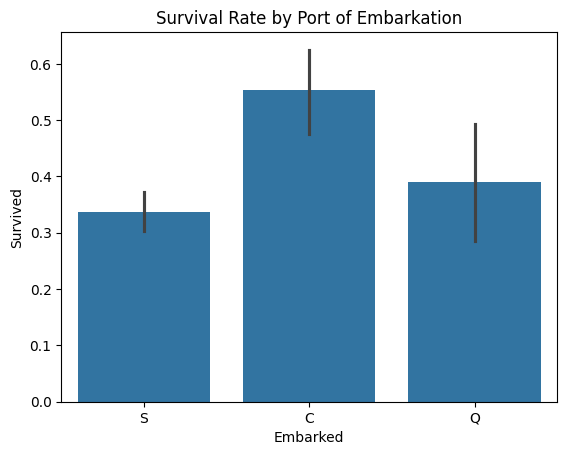

In [ ]:
#Survival by Port of Embarkation
#This plot presents survival rates based on passengers' port of embarkation. Passengers embarking from 'C' (Cherbourg) had a higher survival rate compared to those from 'S' (Southampton) and 'Q' (Queenstown).
#Observation: The survival rate is highest for the passengers who boarded form Cherbourg and lowest for the passengers who boarded from Southampton
sns.barplot(x=data['Embarked'],y=data['Survived'],data=data)
plt.title('Survival Rate by Port of Embarkation')

Text(0.5, 1.0, 'Correlation Heatmap')

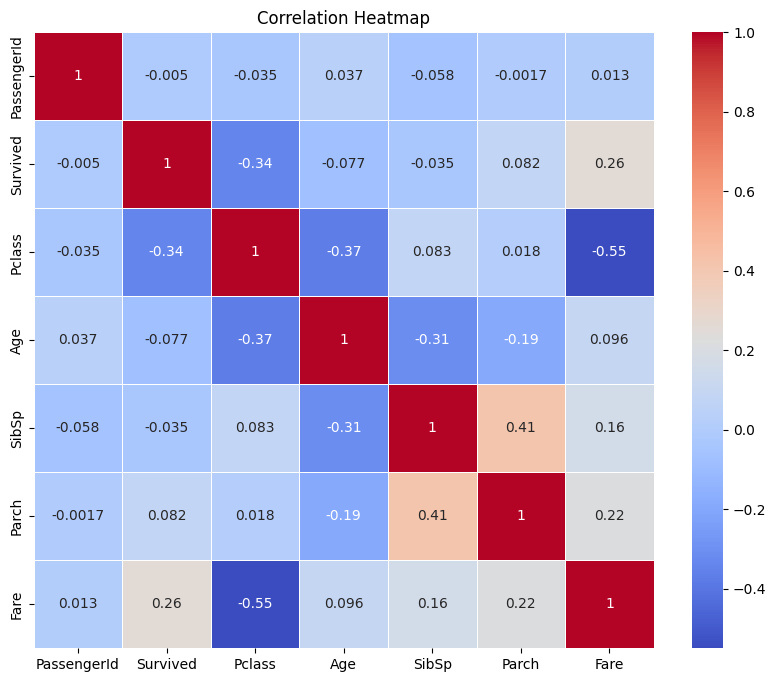

In [ ]:
#Correlation Heatmap
#Observation: This heatmap shows the correlation between numerical variables.The correlation heatmap shows that the "Pclass" and "Fare" columns are possitively correlated with the 'Survival'column, while the 'Age' column is negatively correlated with the 'Survival' column.
#There are moderate correlations among Age, SibSp, and Parch as well.
plt.figure(figsize=(10,8))
 # Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64']) 
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')

## Summary of Findings

The exploratory data analysis (EDA) provided several key insights into the Titanic dataset:

- **Survival Imbalance**: A larger proportion of passengers did not survive the disaster compared to those who did.
- **Gender Impact**: Female passengers had a significantly higher survival rate than male passengers, suggesting that "women and children first" was a major rescue principle.
- **Passenger Class**: Survival rates were much higher for passengers in 1st class compared to 2nd and 3rd classes. Economic status likely influenced access to lifeboats and rescue efforts.
- **Age Factors**: Children appeared to have a slightly better chance of survival compared to adults. The majority of passengers were young adults aged between 20 and 40 years.
- **Fare Analysis**: Survivors tended to have paid higher fares, further supporting the idea that wealthier passengers had better survival odds.
- **Embarkation Port**: Passengers embarking from Cherbourg ('C') had a higher survival rate compared to those from Southampton ('S') and Queenstown ('Q').
- **Missing Data**: 
  - The 'Embarked' feature had minimal missing data and was filled using the mode (most common value).
  - The 'Cabin' feature had a significant amount of missing values; a new binary feature `Has_Cabin` was created to preserve potentially useful information.
- **Correlations**: 'Fare' showed a positive correlation with survival, while 'Pclass' showed a negative correlation, highlighting the importance of socio-economic factors.
> **Note**: Only numerical features were selected for the correlation heatmap since correlation requires numeric inputs. Categorical or text features were excluded automatically.


Overall, the data indicates that survival was strongly influenced by a combination of gender, socio-economic status, and age. These insights can guide further predictive modeling efforts.

